<a href="https://colab.research.google.com/github/ppajewski/Comparsion-of-the-Polynomial-Regression-and-SVR/blob/master/Comparsion_of_the_Polynomial_Regression_and_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparsion of the Polynomial Regression and SVR

## Importing the libraries

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [86]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [87]:
y = y.reshape(len(y),1)

## Feature Scaling

In [88]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_sc = sc_X.fit_transform(X)
y_sc = sc_y.fit_transform(y)

## Training the Polynomial Regression model on the whole dataset

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the SVR model on the whole dataset

In [90]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_sc, y_sc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Visualising the SVR results

## Visualising the SVR results (for higher resolution and smoother curve)

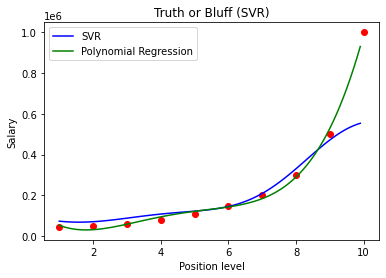

In [91]:
X_grid = np.arange(min(sc_X.inverse_transform(X_sc)), max(sc_X.inverse_transform(X_sc)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_sc), sc_y.inverse_transform(y_sc), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue', label="SVR")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'green', label="Polynomial Regression")
plt.legend(loc="upper left")
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Comparsion

##R-squared 

In [92]:
from sklearn.metrics import r2_score
print(f"R^2 for polynomial regression: {r2_score(y, lin_reg_2.predict(poly_reg.fit_transform(X)))}")
print(f"R^2 for SVR: {r2_score(y, sc_y.inverse_transform(regressor.predict(sc_X.transform(X))))}")

R^2 for polynomial regression: 0.9973922891706615
R^2 for SVR: 0.7516001070620797
